# Sentiment Analysis on Covid-19 Tweets

In [1]:
# Step 1: Import libraries
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download VADER lexicon (only once)
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Load dataset

In [2]:
df = pd.read_csv("covid_tweets.csv")

# Preview dataset
print(df.head())


         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description     user_created  \
0  wednesday addams as a disney princess keepin i...   5/26/2017 5:46   
1  Husband, Father, Columnist & Commentator. Auth...  4/16/2009 20:06   
2  #Christian #Catholic #Conservative #Reagan #Re...  2/28/2009 18:57   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...    3/7/2019 1:45   
4  🖊️Official Twitter handle of Department of Inf...   2/12/2017 6:45   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           

# Step 3: Clean the tweet text

In [3]:
def clean_tweet(text):
    text = str(text).lower()                 # lowercase
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove @mentions
    text = re.sub(r"#", "", text)            # remove hashtag symbol
    text = re.sub(r"[^a-z\s]", "", text)     # keep only letters
    return text.strip()

df["clean_text"] = df["text"].apply(clean_tweet)
print(df["clean_text"].head())


0    if i smelled the scent of hand sanitizers toda...
1    hey   and   wouldnt it have made more sense to...
2    trump never once claimed covid was a hoax we a...
3    the one gift covid has give me is an appreciat...
4    july  media bulletin on novel coronavirusupdat...
Name: clean_text, dtype: object


# Step 4: Sentiment Analysis using VADER

In [4]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)
print(df[["clean_text", "sentiment"]].head())


                                          clean_text sentiment
0  if i smelled the scent of hand sanitizers toda...  Positive
1  hey   and   wouldnt it have made more sense to...  Positive
2  trump never once claimed covid was a hoax we a...  Negative
3  the one gift covid has give me is an appreciat...  Positive
4  july  media bulletin on novel coronavirusupdat...  Positive


# Step 5: Sentiment Distribution Visualization

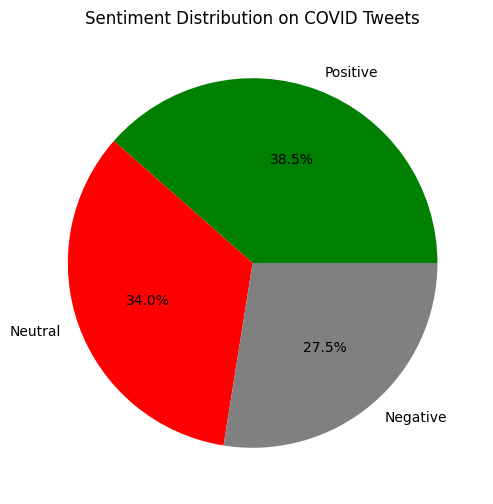

In [5]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,6))
sentiment_counts.plot(kind="pie", autopct='%1.1f%%', colors=["green","red","gray"])
plt.title("Sentiment Distribution on COVID Tweets")
plt.ylabel("")
plt.show()


# Step 6: Sentiment Over Time (optional, if date column is usable)

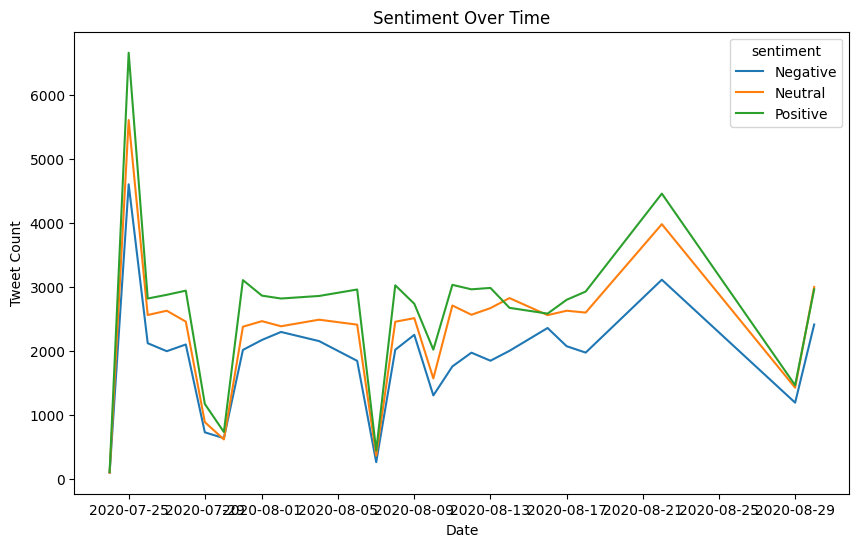

In [6]:

df["date"] = pd.to_datetime(df["date"], errors='coerce')
timeline = df.groupby([df["date"].dt.date, "sentiment"]).size().unstack(fill_value=0)

timeline.plot(kind="line", figsize=(10,6))
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()


# Step 7: Word Cloud for Positive vs Negative Tweets

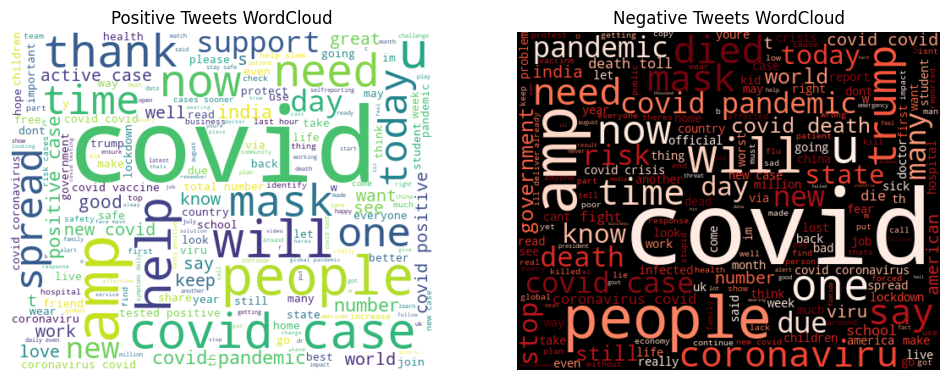

In [7]:
positive_text = " ".join(df[df["sentiment"]=="Positive"]["clean_text"])
negative_text = " ".join(df[df["sentiment"]=="Negative"]["clean_text"])

plt.figure(figsize=(12,5))

# Positive
plt.subplot(1,2,1)
wc_pos = WordCloud(width=500, height=400, background_color="white").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets WordCloud")

# Negative
plt.subplot(1,2,2)
wc_neg = WordCloud(width=500, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets WordCloud")

plt.show()
